In [1]:
from textstat.textstat import textstat
import csv
import pandas
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline
import ast

In [2]:
trump_df = pandas.read_csv('data/all_trump_w_topics.csv')
trump_df['candidate'] = 'trump'
clinton_df = pandas.read_csv('data/all_clinton_w_topics.csv')
clinton_df['candidate'] = 'clinton'
sanders_df = pandas.read_csv('data/all_sanders_w_topics.csv')
sanders_df['candidate'] = 'sanders'
cruz_df = pandas.read_csv('data/all_cruz_w_topics.csv')
cruz_df['candidate'] = 'cruz'
ORGS = ['nyt', 'wsj', 'cnn', 'fox', 'ap', 'reuters', 'politico', 'mcclatchy', 'buzzfeed', 'huffpo','latimes']


In [3]:
n = len(clinton_df) 
clinton_df.index = xrange(len(trump_df), (len(trump_df) + n))
m = len(sanders_df)
sanders_df.index = xrange(max(clinton_df.index), max(clinton_df.index) + m)
c = len(cruz_df)
cruz_df.index = xrange(max(sanders_df.index), max(sanders_df.index) + c)

In [4]:
all_df = pandas.concat([trump_df,clinton_df, sanders_df, cruz_df]) 
all_df['gunning_fog'] = all_df['body'].apply(lambda x: textstat.gunning_fog(x) if type(x) == str else None)
all_df['flesch'] = all_df['body'].apply(lambda x: textstat.flesch_kincaid_grade(x) if type(x) == str else None)
all_df['readability'] = all_df['body'].apply(lambda x: textstat.flesch_reading_ease(x) if type(x) == str else None)

# Convert topics to Dict and Filter by > 0.1

In [5]:
all_df['topic_dict'] = all_df['topic'].apply(lambda d: ast.literal_eval(d))
all_df['top_topics'] = all_df['topic_dict'].apply(lambda d: {k:v for k, v in d.iteritems() if v > 0.1})
all_df['topic_list'] = all_df['top_topics'].apply(lambda d: d.keys()) 
all_df['top_topic'] = all_df['topic_dict'].apply(lambda d: max(d, key=lambda i: d[i]))

# Breakdown of Story Topics

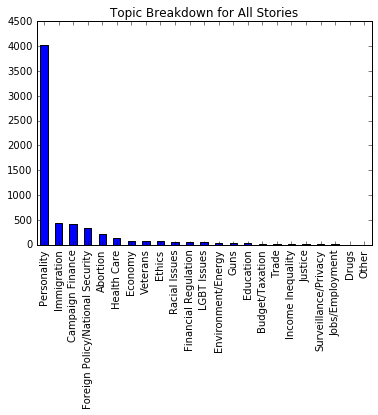

In [6]:
all_df['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for All Stories")
# Top 10: Personality, Immigration, Campaign Finance, Foreign Policy/National Security, Abortion
# Health Care, Economy, Veterans, Ethics, Racial Issues 

##  Average Reading Level Per Publication (Include All Stories)

Flesch Score Dist for latimes
Avg: 9.91


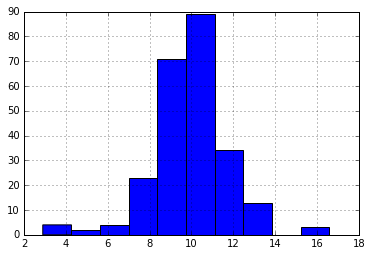

Flesch Score Dist for huffpo
Avg: 9.83


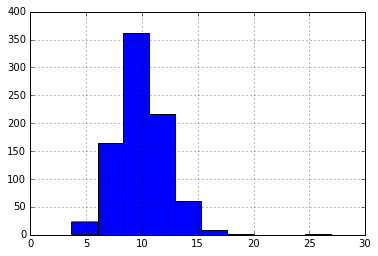

Flesch Score Dist for politico
Avg: 8.69


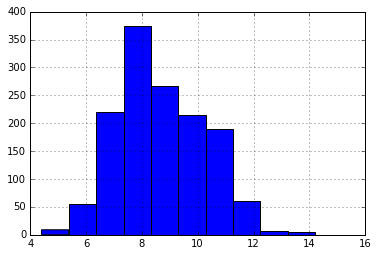

Flesch Score Dist for nyt
Avg: 7.53


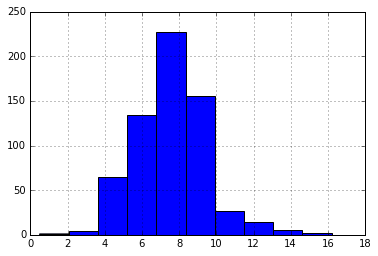

Flesch Score Dist for fox
Avg: 9.25


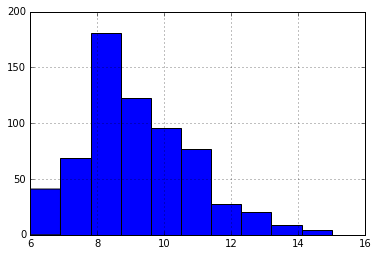

Flesch Score Dist for mcclatchy
Avg: 8.64


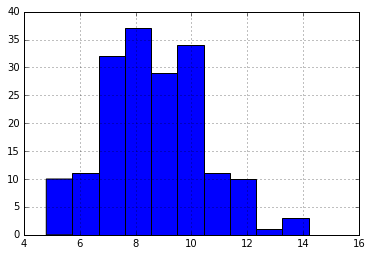

Flesch Score Dist for npr
Avg: 9.87


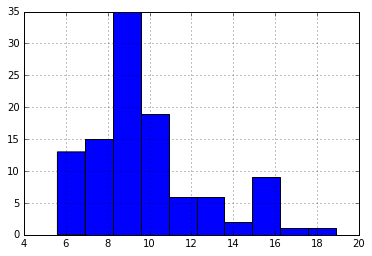

Flesch Score Dist for cnn
Avg: 9.63


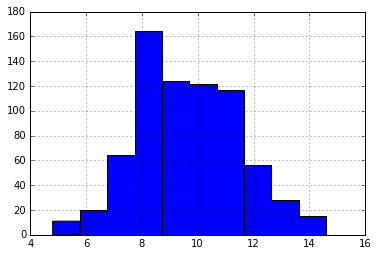

Flesch Score Dist for buzzfeed
Avg: 12.35


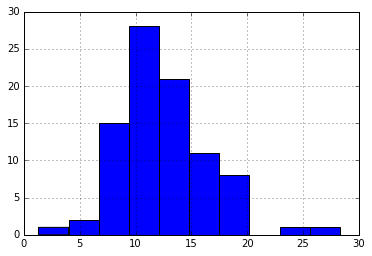

Flesch Score Dist for ap
Avg: 9.62


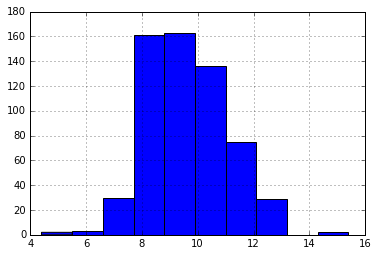

Flesch Score Dist for wsj
Avg: 7.90


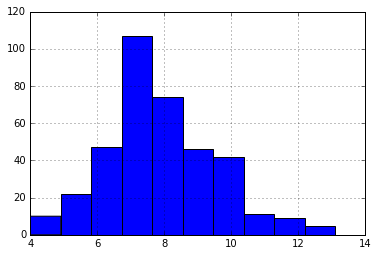

Flesch Score Dist for reuters
Avg: 10.17


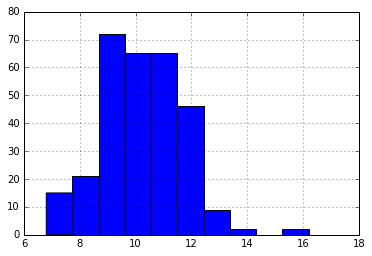

In [22]:
ORGS = all_df['org'].unique()
for o in ORGS:
    print "Flesch Score Dist for",o 
    all_df[all_df['org'] == o]['flesch'].hist()
    print "Avg:", "%.2f" % all_df[all_df['org'] == o]['flesch'].mean()
    matplotlib.pyplot.show() 
    

## Reading Level Per Publication Per Topic

In [23]:
TOPICS = ['Immigration', 'Campaign Finance', 'Foreign Policy/National Security',
         'Abortion', 'Health Care', 'Economy', 'Veterans', 'Ethics', 'Racial Issues', 'Financial Regulation']


In [34]:
for t in TOPICS: 
    scores = []
    for o in ORGS:
        scores.append((o, all_df[(all_df['top_topic'] == t) & (all_df['org'] == o)]['flesch'].mean(),\
                       len(all_df[(all_df['org'] == o ) & (all_df['top_topic'] == t)]))) 
    
    scores.sort(key=lambda x: x[1], reverse=True)
    
    print "TOPIC", t
    for s in scores:
        print s[0], '%.2f' % s[1], "avg", "(", s[2], "stories )"
    print

TOPIC Immigration
buzzfeed 12.39 avg ( 9 stories )
latimes 10.40 avg ( 27 stories )
reuters 10.22 avg ( 33 stories )
huffpo 10.04 avg ( 67 stories )
cnn 9.75 avg ( 63 stories )
ap 9.66 avg ( 33 stories )
fox 9.57 avg ( 56 stories )
npr 9.34 avg ( 7 stories )
mcclatchy 9.22 avg ( 23 stories )
politico 8.32 avg ( 35 stories )
wsj 7.69 avg ( 22 stories )
nyt 7.44 avg ( 70 stories )

TOPIC Campaign Finance
buzzfeed 16.62 avg ( 5 stories )
huffpo 10.74 avg ( 36 stories )
reuters 10.39 avg ( 17 stories )
cnn 10.09 avg ( 33 stories )
latimes 9.87 avg ( 16 stories )
fox 9.60 avg ( 32 stories )
npr 9.20 avg ( 2 stories )
ap 9.05 avg ( 33 stories )
politico 8.85 avg ( 125 stories )
mcclatchy 8.70 avg ( 7 stories )
wsj 7.73 avg ( 29 stories )
nyt 7.48 avg ( 87 stories )

TOPIC Foreign Policy/National Security
buzzfeed 13.52 avg ( 9 stories )
reuters 10.37 avg ( 6 stories )
npr 10.12 avg ( 4 stories )
cnn 9.95 avg ( 49 stories )
huffpo 9.90 avg ( 55 stories )
latimes 9.59 avg ( 7 stories )
ap 9.00

## Average Reading Level per Publication per Candidate Per Topic

In [46]:
CANDIDATES = ['clinton', 'sanders', 'trump', 'cruz']
for t in TOPICS: 
    print "TOPIC", t
    for o in ORGS: 
        print "ORG", o
        scores = []
        for c in CANDIDATES:
            scores.append((c,\
                           all_df[(all_df['top_topic'] == t) & \
                         (all_df['candidate'] == c) & \
                         (all_df['org'] == o)]['flesch'].mean(),\
                          len(all_df[(all_df['top_topic'] == t) & \
                          (all_df['candidate'] == c) & \
                          (all_df['org'] == o)]))) 
        
        scores.sort(key=lambda x: x[1], reverse=True)
        for s in scores:
            print s[0], 'AVG:','%.2f' % s[1], "COUNT:", s[2] 
        print
        
    print "#################################################"
        
        
        
        
        
        
        
        
        
        
        
        

TOPIC Immigration
ORG latimes
trump AVG: 10.58 COUNT: 22
clinton AVG: 10.30 COUNT: 1
sanders AVG: 10.30 COUNT: 1
cruz AVG: 9.13 COUNT: 3

ORG huffpo
sanders AVG: 10.63 COUNT: 6
clinton AVG: 10.62 COUNT: 4
cruz AVG: 9.94 COUNT: 9
trump AVG: 9.94 COUNT: 48

ORG politico
clinton AVG: 9.90 COUNT: 2
trump AVG: 8.24 COUNT: 19
cruz AVG: 8.23 COUNT: 13
sanders AVG: 7.90 COUNT: 1

ORG nyt
sanders AVG: 9.98 COUNT: 5
clinton AVG: 9.60 COUNT: 5
trump AVG: 7.30 COUNT: 40
cruz AVG: 6.55 COUNT: 20

ORG fox
clinton AVG: 9.50 COUNT: 2
sanders AVG: nan COUNT: 0
trump AVG: 9.76 COUNT: 37
cruz AVG: 9.17 COUNT: 17

ORG mcclatchy
clinton AVG: 10.70 COUNT: 1
sanders AVG: 10.70 COUNT: 1
trump AVG: 9.23 COUNT: 12
cruz AVG: 8.87 COUNT: 9

ORG npr
clinton AVG: nan COUNT: 0
sanders AVG: nan COUNT: 0
cruz AVG: 10.30 COUNT: 1
trump AVG: 9.18 COUNT: 6

ORG cnn
clinton AVG: 12.05 COUNT: 2
sanders AVG: 10.90 COUNT: 2
cruz AVG: 10.20 COUNT: 23
trump AVG: 9.28 COUNT: 36

ORG buzzfeed
clinton AVG: nan COUNT: 0
sanders AV

## 